##K-Means Clustering

Pada project kali ini menggunakan data yang sudah dicleansing dan langsung dapat digunakan. Datanya berasal dari Kable Nutritionals yang memiliki data customer, product, store dan transaction. Pada project ini menggunakan metode KMeans Clustering dimana akan memetakan segmentasi pelanggan berdasarkan centroid yang sudah dibuat.

Untuk prosesnya adalah

*   Import Library
*   Import Data
*   Cleaning Data
*   Merging Data
*   Feature Engineering
*   Exploratory Data Analysis
*   Modelling









#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Loading Data and Cleansing Data

In [2]:
customer_data = pd.read_csv("customer.csv")
product_data = pd.read_csv("product.csv")
store_data = pd.read_csv("store.csv")
transaction_data = pd.read_csv("transaction.csv")

Customer Data

In [3]:
customer_data

,customer_id,age,gender,marital_status,income
0,1,55,1,Married,5
1,2,60,1,Married,6
2,3,32,1,Married,9
3,4,31,1,Married,4
4,5,58,1,Married,3
...,...,...,...,...,...
442,443,33,1,NaN,9
443,444,53,0,Married,15
444,445,51,0,Married,14
445,446,57,0,Married,7


In [4]:
customer_data.shape

(447, 5)

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     447 non-null    int64 
 1   age             447 non-null    int64 
 2   gender          447 non-null    int64 
 3   marital_status  444 non-null    object
 4   income          447 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 17.6+ KB


In [6]:
customer_data.isnull().sum()

customer_id       0
age               0
gender            0
marital_status    3
income            0
dtype: int64

In [7]:
#ubah tipe data ke string
customer_data['marital_status']= customer_data['marital_status'].astype('string')
print(customer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     447 non-null    int64 
 1   age             447 non-null    int64 
 2   gender          447 non-null    int64 
 3   marital_status  444 non-null    string
 4   income          447 non-null    int64 
dtypes: int64(4), string(1)
memory usage: 17.6 KB
None


In [8]:
customer_data['marital_status'].fillna('Tidak tahu', inplace=True)
customer_data

,customer_id,age,gender,marital_status,income
0,1,55,1,Married,5
1,2,60,1,Married,6
2,3,32,1,Married,9
3,4,31,1,Married,4
4,5,58,1,Married,3
...,...,...,...,...,...
442,443,33,1,Tidak tahu,9
443,444,53,0,Married,15
444,445,51,0,Married,14
445,446,57,0,Married,7


In [9]:
customer_data.isnull().sum()

customer_id       0
age               0
gender            0
marital_status    0
income            0
dtype: int64

Product Data

In [10]:
product_data.head()

,product_id,product_name,price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [11]:
product_data.shape

(10, 3)

In [12]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    10 non-null     object
 1   product_name  10 non-null     object
 2   price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [13]:
#ubah tipe data ke string
product_data['product_name']= product_data['product_name'].astype('string')
print(product_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    10 non-null     object
 1   product_name  10 non-null     string
 2   price         10 non-null     int64 
dtypes: int64(1), object(1), string(1)
memory usage: 368.0+ bytes
None


In [14]:
product_data.isnull().sum()

product_id      0
product_name    0
price           0
dtype: int64

Store Data

In [15]:
store_data.head()

,store_id,store_name,group_store,type,latitude,longitude
0,1,Prima Tendean,Prima,Modern Trade,2,106
1,2,Prima Kelapa Dua,Prima,Modern Trade,914864,107
2,3,Prima Kota,Prima,Modern Trade,797068,110
3,4,Gita Ginara,Gita,General Trade,966667,110
4,5,Bonafid,Gita,General Trade,250445,112


In [16]:
store_data.shape

(14, 6)

In [17]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   store_id     14 non-null     int64 
 1   store_name   14 non-null     object
 2   group_store  14 non-null     object
 3   type         14 non-null     object
 4   latitude     14 non-null     int64 
 5   longitude    14 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 800.0+ bytes


In [18]:
#ubah tipe data ke string
store_data['store_name']= store_data['store_name'].astype('string')
store_data['group_store']= store_data['group_store'].astype('string')
store_data['type']= store_data['type'].astype('string')
print(store_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   store_id     14 non-null     int64 
 1   store_name   14 non-null     string
 2   group_store  14 non-null     string
 3   type         14 non-null     string
 4   latitude     14 non-null     int64 
 5   longitude    14 non-null     int64 
dtypes: int64(3), string(3)
memory usage: 800.0 bytes
None


In [19]:
store_data.isnull().sum()

store_id       0
store_name     0
group_store    0
type           0
latitude       0
longitude      0
dtype: int64

Transaction Data

In [20]:
transaction_data.head()

,transaction_id,customer_id,date,product_id,price,qty,total_amount,store_id
0,TR11369,328,01-01-22,P3,7500,4,30000,12
1,TR16356,165,01-01-22,P9,10000,7,70000,1
2,TR1984,183,01-01-22,P1,8800,4,35200,4
3,TR35256,160,01-01-22,P1,8800,7,61600,4
4,TR41231,386,01-01-22,P9,10000,1,10000,4


In [21]:
transaction_data.shape

(5020, 8)

In [22]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  5020 non-null   object
 1   customer_id     5020 non-null   int64 
 2   date            5020 non-null   object
 3   product_id      5020 non-null   object
 4   price           5020 non-null   int64 
 5   qty             5020 non-null   int64 
 6   total_amount    5020 non-null   int64 
 7   store_id        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [23]:
#ubah tipe data ke tanggal
transaction_data['date'] = pd.to_datetime(transaction_data['date'])
print(transaction_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  5020 non-null   object        
 1   customer_id     5020 non-null   int64         
 2   date            5020 non-null   datetime64[ns]
 3   product_id      5020 non-null   object        
 4   price           5020 non-null   int64         
 5   qty             5020 non-null   int64         
 6   total_amount    5020 non-null   int64         
 7   store_id        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB
None


In [24]:
#transaction_data

#Merging Data

In [25]:
merge_data = customer_data.merge(transaction_data, on='customer_id').merge(product_data, on='product_id').merge(store_data, on='store_id')

In [26]:
merge_data

,customer_id,age,gender,marital_status,income,transaction_id,date,product_id,price_x,qty,total_amount,store_id,product_name,price_y,store_name,group_store,type,latitude,longitude
0,1,55,1,Married,5,TR54475,2022-02-23,P8,16000,1,16000,9,Oat,16000,Lingga,Lingga,Modern Trade,654703,128
1,5,58,1,Married,3,TR53643,2022-05-22,P8,16000,3,48000,9,Oat,16000,Lingga,Lingga,Modern Trade,654703,128
2,7,31,0,Married,4,TR5151,2022-10-03,P8,16000,2,32000,9,Oat,16000,Lingga,Lingga,Modern Trade,654703,128
3,19,24,1,Single,4,TR98635,2022-06-18,P8,16000,1,16000,9,Oat,16000,Lingga,Lingga,Modern Trade,654703,128
4,28,55,0,Married,6,TR9420,2022-12-01,P8,16000,3,48000,9,Oat,16000,Lingga,Lingga,Modern Trade,654703,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,403,30,0,Married,4,TR21751,2022-07-10,P9,10000,5,50000,7,Yoghurt,10000,Buana Indah,Buana,General Trade,316694,114
5016,410,55,1,Married,8,TR86692,2022-05-04,P9,10000,2,20000,7,Yoghurt,10000,Buana Indah,Buana,General Trade,316694,114
5017,411,19,1,Single,0,TR67993,2022-10-23,P9,10000,2,20000,7,Yoghurt,10000,Buana Indah,Buana,General Trade,316694,114
5018,427,54,0,Married,16,TR28578,2022-10-30,P9,10000,3,30000,7,Yoghurt,10000,Buana Indah,Buana,General Trade,316694,114


In [27]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     5020 non-null   int64         
 1   age             5020 non-null   int64         
 2   gender          5020 non-null   int64         
 3   marital_status  5020 non-null   string        
 4   income          5020 non-null   int64         
 5   transaction_id  5020 non-null   object        
 6   date            5020 non-null   datetime64[ns]
 7   product_id      5020 non-null   object        
 8   price_x         5020 non-null   int64         
 9   qty             5020 non-null   int64         
 10  total_amount    5020 non-null   int64         
 11  store_id        5020 non-null   int64         
 12  product_name    5020 non-null   string        
 13  price_y         5020 non-null   int64         
 14  store_name      5020 non-null   string        
 15  grou

In [28]:
merge_data.isnull().sum()

customer_id       0
age               0
gender            0
marital_status    0
income            0
transaction_id    0
date              0
product_id        0
price_x           0
qty               0
total_amount      0
store_id          0
product_name      0
price_y           0
store_name        0
group_store       0
type              0
latitude          0
longitude         0
dtype: int64

#Feature Engineering

In [29]:
data_fix = merge_data.groupby(['customer_id']).agg(
    total_transaction = ('transaction_id','count'),
    total_quality = ('qty','sum'),
    total_amount = ('total_amount', 'sum')
)
data_fix.sort_values(by="total_amount", ascending=False)

,total_transaction,total_quality,total_amount
customer_id,,,
365,20,75,846700
89,19,79,760600
392,20,71,751400
184,14,64,676200
13,19,68,669000
...,...,...,...
208,6,24,121400
441,5,13,115200
439,7,26,113800


In [30]:
data_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 1 to 447
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   total_transaction  447 non-null    int64
 1   total_quality      447 non-null    int64
 2   total_amount       447 non-null    int64
dtypes: int64(3)
memory usage: 14.0 KB


#Exploratory Data Analysis

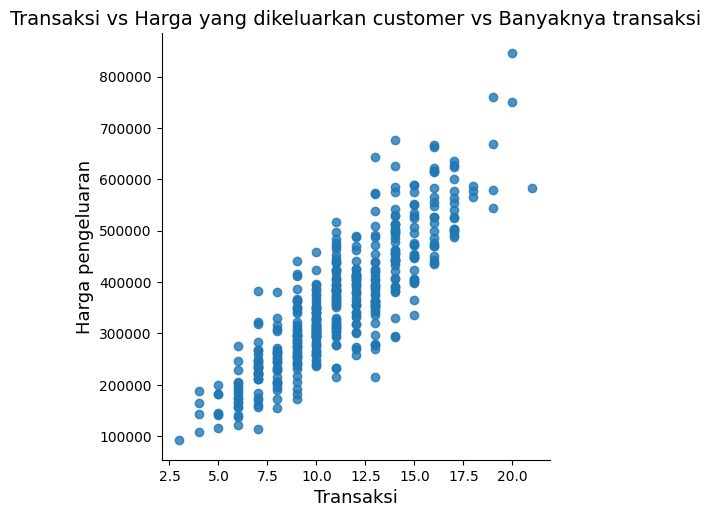

In [31]:
sns.lmplot(x='total_transaction', y='total_amount', data=data_fix, fit_reg=False, height=5, palette='Dark2')
plt.title('Transaksi vs Harga yang dikeluarkan customer vs Banyaknya transaksi', fontsize=14)
plt.xlabel('Transaksi', fontsize=13)
plt.ylabel('Harga pengeluaran', fontsize=13)
plt.show()

#K-Means Clustering Model

Menemukan nilai WCSS

In [32]:
X = data_fix.iloc[:,[0,1,2]].values
X[:447]

array([[    17,     60, 623300],
       [    13,     57, 392300],
       [    15,     56, 446200],
       ...,
       [    18,     68, 587200],
       [    11,     42, 423300],
       [    13,     42, 439300]])

In [33]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i, init = 'k-means++',n_init=10, max_iter=300, tol=0.0001, random_state = 100)
    model.fit(X)
    wcss.append(model.inertia_)
print(wcss)

[6928031859602.738, 2434755241638.5283, 1233416630536.0532, 776512017046.2605, 504081360603.5857, 382121220808.0775, 277934833180.1248, 212853440612.7635, 171266010275.35165, 137780280512.4177]


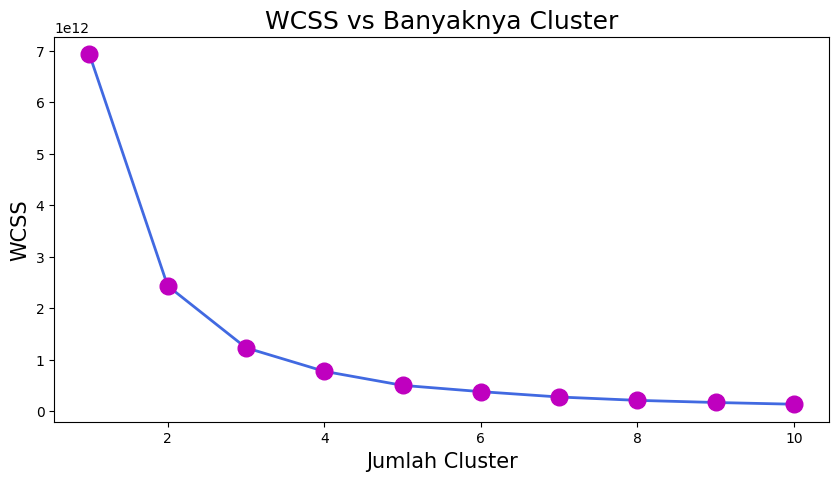

In [34]:
plt.figure(figsize=(10,5))
plt.plot(list(range(1, 11)), wcss, color='royalblue', marker='o', linewidth=2, markersize=12, markerfacecolor='m', markeredgecolor='m')
plt.title('WCSS vs Banyaknya Cluster', fontsize=18)
plt.xlabel('Jumlah Cluster', fontsize=15)
plt.ylabel('WCSS', fontsize=15)
plt.show()

Ditemukan pada grafik diatas bahwa K = 3

Modelling

In [35]:
model= KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
model.fit(X)
labels=model.labels_
centroid=model.cluster_centers_

In [36]:
y = model.fit_predict(X)
print(y)

[1 0 0 2 2 0 1 1 0 1 2 1 1 0 0 0 0 0 1 1 2 0 1 0 2 2 0 0 0 0 0 0 2 1 2 0 1
 2 0 2 2 0 1 1 1 1 1 0 0 2 0 0 0 0 0 2 0 0 2 0 2 0 1 2 2 0 0 2 0 0 2 1 1 2
 0 1 0 2 2 0 0 0 0 1 0 0 0 1 1 0 2 0 0 2 0 0 0 0 0 2 0 0 0 2 1 1 1 0 2 2 2
 1 2 1 1 0 2 1 0 1 0 2 2 0 2 2 1 2 0 0 1 0 1 0 0 2 0 0 2 0 0 0 2 2 2 2 0 2
 0 1 0 0 2 0 0 1 1 1 0 0 0 0 0 2 0 1 1 0 0 2 1 1 0 0 2 2 0 0 2 2 0 2 2 1 2
 0 1 2 1 0 0 2 2 2 0 2 2 0 1 2 0 0 0 0 2 0 2 2 0 1 0 2 0 0 0 2 1 0 1 2 0 1
 0 2 0 0 2 0 0 2 0 0 1 1 1 0 0 2 0 1 2 2 0 0 1 0 0 2 2 2 2 2 0 0 2 0 0 2 2
 1 2 2 1 1 2 2 0 0 0 1 2 1 0 2 2 1 1 0 0 0 1 1 1 0 2 2 0 0 0 2 2 2 2 2 0 2
 2 0 1 2 1 2 1 0 2 1 0 0 2 0 1 2 2 2 0 2 0 2 0 2 1 0 2 2 2 1 0 2 1 0 2 2 2
 2 0 0 2 2 0 0 0 0 2 2 0 2 0 1 2 0 2 0 0 2 0 1 1 0 2 0 0 0 0 0 1 1 2 2 1 1
 2 0 2 1 2 0 2 0 0 0 2 2 2 1 2 0 2 2 2 2 0 1 0 0 2 2 2 2 2 2 0 2 0 0 2 2 2
 0 0 2 2 2 0 0 0 1 1 2 2 2 2 1 1 1 2 2 1 2 0 1 0 2 0 1 0 0 2 0 2 0 2 2 1 1
 1 0 0]


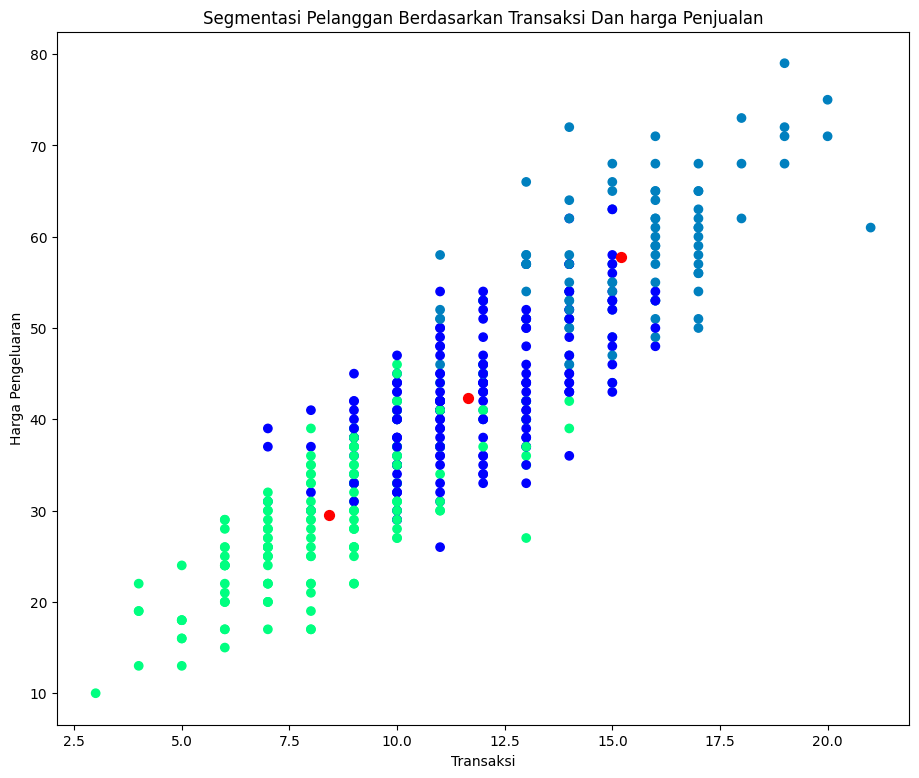

In [37]:
# Plotting all the clusters
plt.figure(figsize=(11,9))

# plot the centroids
plt.scatter(x=data_fix['total_transaction'], y=data_fix['total_quality'], c=labels, cmap='winter')
plt.scatter(x=centroid[:,0], y=centroid[:,1], s=50, c='red', label='Centroids')

plt.title('Segmentasi Pelanggan Berdasarkan Transaksi Dan harga Penjualan')
plt.xlabel('Transaksi')
plt.ylabel('Harga Pengeluaran')
plt.show()